<a href="https://colab.research.google.com/github/dgg32/ml_pycaret/blob/main/pycaret_nlp_beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

     |████████████████████████████████| 256kB 6.0MB/s 
     |████████████████████████████████| 1.8MB 42.4MB/s 
     |████████████████████████████████| 266kB 43.5MB/s 
     |████████████████████████████████| 148.9MB 73kB/s 
     |████████████████████████████████| 13.9MB 178kB/s 
     |████████████████████████████████| 102kB 10.0MB/s 
     |████████████████████████████████| 1.6MB 33.8MB/s 
     |████████████████████████████████| 276kB 44.2MB/s 
     |████████████████████████████████| 6.8MB 28.7MB/s 
     |████████████████████████████████| 66.3MB 140kB/s 
     |████████████████████████████████| 174kB 45.9MB/s 
     |████████████████████████████████| 71kB 7.9MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
     |████████████████████████████████| 3.1MB 38.3MB/s 
     |████████████████████████████████| 604kB 37.2MB/s 
     |████████████████████████████████| 1.1MB 31.8MB/s 
     |████████████████████████████████| 337kB 45.6MB/s 

In [2]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# What is Natural Language Processing?

Natural Language Processing (NLP in short) is a branch of artificial intelligence that deals with analyzing, understanding and generating the languages that humans use naturally in order to interface with computers in both written and spoken contexts using natural human languages instead of computer languages. Some of the common use case of NLP in machine learning are:

    Topic discovery and modeling: Capture the meaning and themes in text collections, and apply advanced modeling techniques such as Topic Modeling to group similar documents together.
    Sentiment Analysis: Identifying the mood or subjective opinions within large amounts of text, including average sentiment and opinion mining.
    Document summarization: Automatically generating synopses of large bodies of text.
    Speech-to-text and text-to-speech conversion: Transforming voice commands into written text, and vice versa.
    Machine translation: Automatic translation of text or speech from one language to another.


# Overview of Natural Language Processing Module in PyCaret

PyCaret's NLP module (pycaret.nlp) is an unsupervised machine learning module which can be used for analyzing the text data by creating topic model to find hidden semantic structure in documents. PyCaret's NLP module comes built-in with a wide range of text pre-processing techniques which is the fundamental step in any NLP problem. It transforms the raw text into a format that machine learning algorithms can learn from.

As of first release, PyCaret's NLP module only support English language and provides several popular implementation of topic models from Latent Dirichlet Allocation to Non-Negative Matrix Factorization. It has over 5 ready-to-use algorithms and over 10 plots to analyze the text. PyCaret's NLP module also implements a unique function tune_model() that allows you to tune the hyperparameters of a topic model to optimize the supervised learning objective such as AUC for classification or R2 for regression.

# Dataset for the Tutorial

For this tutorial we will be using data from Kiva Microfunds https://www.kiva.org/. Kiva Microfunds is a non-profit that allows individuals to lend money to low-income entrepreneurs and students around the world. Since starting in 2005, Kiva has crowd-funded millions of loans with a repayment rate of around 98%. At Kiva, each loan request includes both traditional demographic information on the borrower, such as gender and location, as well as a personal story. In this tutorial we will use the text given in personal story to gain insights of the dataset and understand hidden semantic structure in the text. The dataset contains 6,818 samples. Short description of features are below:

    country: country of borrower
    en: Personal story of borrower when applied for loan
    gender: Gender (M=male, F=female)
    loan_amount: Amount of loan approved and disbursed
    nonpayment: Type of lender (Lender = personal registered user on Kiva website, Partner = microfinance institution who work with Kiva to find and fund loans)
    sector: sector of borrower
    status: status of loan (1-default, 0-repaid)

In this tutorial we will only use en column to create topic model. In next tutorial Natural Language Processing (NLP102) - Level Intermediate we will use topic model to build a classifier that predicts status of loan to know whether the applicant will default or not.

In [3]:
from pycaret.datasets import get_data
data = get_data("kiva")

,country,en,gender,loan_amount,nonpayment,sector,status
0,Dominican Republic,"""Banco Esperanza"" is a group of 10 women looki...",F,1225,partner,Retail,0
1,Dominican Republic,"""Caminemos Hacia Adelante"" or ""Walking Forward...",F,1975,lender,Clothing,0
2,Dominican Republic,"""Creciendo Por La Union"" is a group of 10 peop...",F,2175,partner,Clothing,0
3,Dominican Republic,"""Cristo Vive"" (""Christ lives"" is a group of 10...",F,1425,partner,Clothing,0
4,Dominican Republic,"""Cristo Vive"" is a large group of 35 people, 2...",F,4025,partner,Food,0


In [4]:
data.shape

(6818, 7)

In [5]:
data = data.sample(1000, random_state=786).reset_index(drop=True)
data.shape

(1000, 7)

# Setting up Environment in PyCaret

setup() function initializes the environment in pycaret and performs several text pre-processing steps that are imperative to work with NLP problems. setup must be called before executing any other function in pycaret. It takes two parameters: pandas dataframe and name of the text column passed as target parameter. You can also pass a list containing text, in which case you don't need to pass target parameter. When setup is executed, following pre-processing steps are applied automatically:

    Removing Numeric Characters: All numeric characters are removed from the text. They are replaced with blanks.

    Removing Special Characters: All non-alphanumeric special characters are removed from the text. They are also replaced with blanks.

    Word Tokenization: Word tokenization is the process of splitting a large sample of text into words. This is the core requirement in natural language processing tasks where each word needs to be captured separately for further analysis. Read More

    Stopword Removal: A stop word (or stopword) is a word that is often removed from text because it is common and provides little value for information retrieval, even though it might be linguistically meaningful. Example of such words in english language are: "the", "a", "an", "in" etc. Read More

    Bigram Extraction: A bigram is a sequence of two adjacent elements from a string of tokens, which are typically letters, syllables, or words. For example: word New York is captured as two different words "New" and "York" when tokenization is performed but if it is repeated enough times, Bigram Extraction will represent the word as one i.e. "New_York" Read More

    Trigram Extraction: Similar to bigram extraction, trigram is a sequence of three adjacent elements from a string of tokens. Read More

    Lemmatizing: Lemmatization is the process of grouping together the inflected forms of a word so they can be analysed as a single word, identified by the word's lemma, or dictionary form. In English language, word appears in several inflected forms. For example the verb 'to walk' may appear as 'walk', 'walked', 'walks', 'walking'. The base form, 'walk', that one might look up in a dictionary, is called the lemma for the word. Read More

    Custom Stopwords: Many times text contains words that are not stopwords by the rule of language but they add no or very little information. For example, in this tutorial we are using the loan dataset. As such, words like "loan", "bank", "money", "business" are too obvious and adds no value. More often than not, they also add a lot of noise in the topic model. You can remove those words from corpus by using custom_stopwords parameter. In next tutorial, Natural Language Processing Tutorial (NLP102) - Level Intermediate we will demonstrate the use of custom_stopwords parameter inside setup(). 

In [6]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [7]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [8]:
from pycaret.nlp import *
exp_nlp101 = setup(data=data, target="en", session_id=123)

Description,Value
session_id,123
Documents,1000
Vocab Size,4573
Custom Stopwords,False




Once the setup is succesfully executed it prints the information grid with the following information:

    session_id : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment session_id is set as 123 for later reproducibility.

    # Documents : Number of documents (or samples in dataset if dataframe is passed).

    Vocab Size : Size of vocabulary in the corpus after applying all text pre-processing such as removal of stopwords, bigram/trigram extraction, lemmatization etc.

Notice that all text pre-processing steps are performed automatically when you execute setup(). These steps are imperative to perform any NLP experiment. setup() function prepares the corpus and dictionary that is ready-to-use for the topic models that you can create using create_model() function. Another way to pass the text is in the form of list in which case no target parameter is needed.


# Create a Topic Model



What is Topic Model? In machine learning and natural language processing, a topic model is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents. Topic modeling is a frequently used text-mining tool for discovery of hidden semantic structures in a text body. Intuitively, given that a document is about a particular topic, one would expect particular words to appear in the document more or less frequently: "dog" and "bone" will appear more often in documents about dogs, "cat" and "meow" will appear in documents about cats, and "the" and "is" will appear equally in both. A document typically concerns multiple topics in different proportions; thus, in a document that is 10% about cats and 90% about dogs, there would probably be about 9 times more dog words than cat words. The "topics" produced by topic modeling techniques are clusters of similar words. A topic model captures this intuition in a mathematical framework, which allows examining a set of documents and discovering, based on the statistics of the words in each, what the topics might be and what each document's balance of topics is. Read More

Creating a topic model in PyCaret is simple and similar to how you would have created a model in supervised modules of pycaret. A topic model is created using create_model() function which takes one mandatory parameter i.e. name of model as a string. This function returns a trained model object. There are 5 topic models available in PyCaret. see the docstring of create_model() for complete list of models. See an example below where we create Latent Dirichlet Allocation (LDA) model:


In [9]:
lda = create_model("lda")

In [10]:
print (lda)

LdaModel(num_terms=4573, num_topics=4, decay=0.5, chunksize=100)


In [11]:
lda2 = create_model("lda", num_topics=6, multi_core=True)

In [13]:
print (lda2)

LdaModel(num_terms=4573, num_topics=6, decay=0.5, chunksize=100)


# Assign a Model

Now that we have created a topic model, we would like to assign the topic proportions to our dataset (6818 documents / samples) to analyze the results. We will achieve this by using assign_model() function. See an example below:

In [14]:
lda_results = assign_model(lda)
lda_results.head()

,country,en,gender,loan_amount,nonpayment,sector,status,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,Kenya,praxide marry child primary school train tailo...,F,75,partner,Services,0,0.001901,0.006526,0.989895,0.001678,Topic 2,0.99
1,Kenya,practitioner run year old life wife child biol...,M,1200,partner,Health,0,0.284692,0.150754,0.562938,0.001615,Topic 2,0.56
2,Dominican Republic,live child boy girl range year sell use clothi...,F,150,partner,Clothing,0,0.002062,0.218126,0.777992,0.001820,Topic 2,0.78
3,Kenya,phanice marry child daughter secondary school ...,F,150,lender,Services,1,0.002106,0.072504,0.923531,0.001859,Topic 2,0.92
4,Kenya,year old hotel kaptembwa operating hotel last ...,F,300,lender,Food,1,0.001864,0.121781,0.874709,0.001646,Topic 2,0.87


# Plot a Model

plot_model() function can be used to analyze the overall corpus or only specific topics extracted through topic model. Hence the function plot_model() can also work without passing any trained model object. See examples below:

Frequency Distribution of Entire Corpus

In [15]:
plot_model()

Top 100 Bigrams on Entire Corpus

In [16]:
plot_model(plot="bigram")

Frequency Distribution of Topic 1

In [17]:
plot_model(lda, plot="frequency", topic_num="Topic 1")

Topic Distribution

In [18]:
plot_model(lda, plot="topic_distribution")



Each document is a distribution of topics and not a single topic. Although, if the task is of categorizing document into specific topics, it wouldn't be wrong to use the topic proportion with highest value to categorize the document into a topic. In above plot, each document is categorized into one topic using the largest proportion of topic weights. We can see most of the documents are in Topic 3 with only few in Topic 1. If you hover over these bars, you will get basic idea of themes in this topic by looking at the keywords. For example if you evaluate Topic 2, you will see keywords words like 'farmer', 'rice', 'land', which probably means that the loan applicants in this category pertains to agricultural/farming loans. However, if you hover over Topic 0 and Topic 3 you will observe lot of repitions and keywords are overlapping in all topics such as word "loan" and "business" appears both in Topic 0 and Topic 3. In next tutorial, Natural Language Processing Tutorial (NLP102) - Level Intermediate we will demonstrate the use of custom_stopwords at which point we will re-analyze this plot.


## T-distributed Stochastic Neighbor Embedding (t-SNE)



T-distributed Stochastic Neighbor Embedding (t-SNE) is a nonlinear dimensionality reduction technique well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions.

In [19]:
plot_model(lda, plot="tsne")

## Uniform Manifold Approximation and Projection Plot

UMAP (Uniform Manifold Approximation and Projection) is a novel manifold learning technique for dimensionality reduction. It is similar to tSNE and PCA in its purpose as all of them are techniques to reduce dimensionality for 2d/3d projections. UMAP is constructed from a theoretical framework based in Riemannian geometry and algebraic topology.

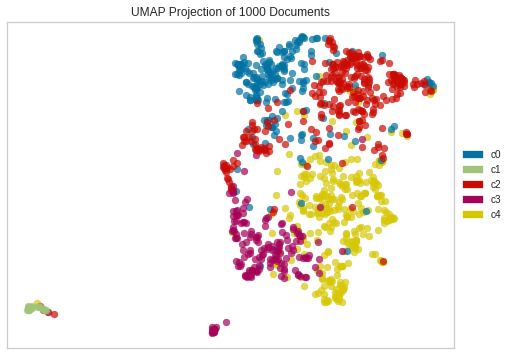

In [20]:
plot_model(lda, plot="umap")

# Evaluate Model



Another way to analyze performance of models is to use evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function. See below example where we have generated Sentiment Polarity Plot for Topic 3 using LDA model stored in lda variable.


In [21]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

# Saving the model

In [22]:
save_model(lda, "Final LDA MOdel 19Nov2020")

Model Succesfully Saved


(<gensim.models.ldamodel.LdaModel at 0x7f943c292e48>,
 'Final LDA MOdel 19Nov2020.pkl')

# Loading the model

In [23]:
saved_lda = load_model("Final LDA MOdel 19Nov2020")

Model Sucessfully Loaded


In [24]:
print (saved_lda)

LdaModel(num_terms=4573, num_topics=4, decay=0.5, chunksize=100)
